# Lyra Graphtool How-tos

### 1. Quick Setup

In [ ]:
import random
from copy import deepcopy
from random import randint

import lyra_graphtool as lgtool
from lyra_graphtool import Configuration, Config_Single_Time, Edge, Graph, Graph_Type, Parameters, Vertex, Worker_Type, Vertex_Type

In [ ]:
pargs = lgtool.ProcessArgs.load(arguments_file='ready_setups/args_sample', graph_file='ready_setups/graph_sample.json')

In [ ]:
params = lgtool.Parameters(pargs.graph, 
                           budget = pargs.args_trial.budget, 
                           duration_time = pargs.args_trial.duration,
                           cost_rate = pargs.worker_cost_rate
                           )

cfg = lgtool.Configuration(params)

`lyra_graphtool.Configuration` object contains not only graph, that is to be optimized, but also problem constraints and setup such as: budget, duration, worker's cost rates. Configuration object contains `lyra_graphtool.Graph`, which is an object with useful methods on it's own. Further in the notebook we will present methods of both Configuration and Graph that you may find useful when creating solution. One of such methods for Graph object is `print_graph()` presented below.

Problem budget constraint: 1000.0
Problem duration constraint: 20
Worker cost rates per timestep: {<Worker_Type.WORKER1: 0>: 100.0, <Worker_Type.WORKER2: 1>: 200.0, <Worker_Type.WORKER3: 2>: 500.0}


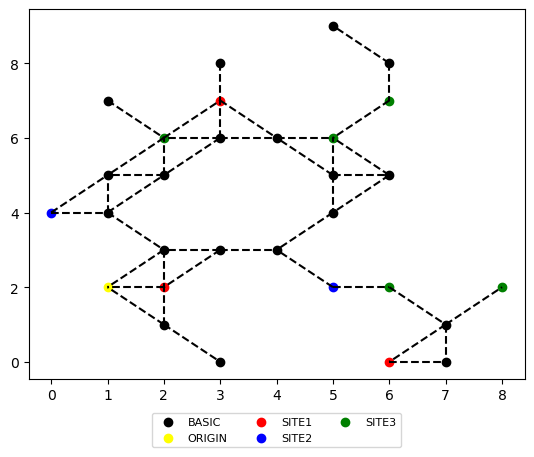

In [ ]:
print(f"Problem budget constraint: {cfg.budget}")
print(f"Problem duration constraint: {cfg.duration_time}")
print(f"Worker cost rates per timestep: {cfg.worker_cost_rate}")
cfg.graph.print_graph()

Such `Configuration` object contains a dictionary under `config` attribute. It is in the following format:
```python
{
    worker_type_1:
        {
            worker_1:
                {
                    timestep_1: Config_Single_Time,
                    timestep_2: Config_Single_Time,
                    ...
                    timestep_n: Config_Single_Time,
                },
            worker_2:
                {
                    timestep_1: Config_Single_Time,
                    timestep_2: Config_Single_Time,
                    ...
                    timestep_n: Config_Single_Time,
                }
            ...
            worker_n:
                {
                    timestep_1: Config_Single_Time,
                    timestep_2: Config_Single_Time,
                    ...
                    timestep_n: Config_Single_Time,
                }
        }
    ...
    worker_type_n:
        {
            worker_1:
                {
                    timestep_1: Config_Single_Time,
                    timestep_2: Config_Single_Time,
                    ...
                    timestep_n: Config_Single_Time,
                },
            worker_2:
                {
                    timestep_1: Config_Single_Time,
                    timestep_2: Config_Single_Time,
                    ...
                    timestep_n: Config_Single_Time,
                }
            ...
            worker_n:
                {
                    timestep_1: Config_Single_Time,
                    timestep_2: Config_Single_Time,
                    ...
                    timestep_n: Config_Single_Time,
                }
        }
}
```

The goal of this challenge is to fill it in the most optimal way.
Each timestep has a `Config_Single_Time` object, which at the beginning. 
An example below:

In [ ]:
# The indexes are cfg.config[worker_type][worker_number][timestep]
print(cfg.config[Worker_Type.WORKER1][0][0])
cfg.config[Worker_Type.WORKER1][0][0].info()

[(None, None), None, False]